# Lab Task 3: NYC Flights_more 

### Name :

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

## (Task 1) Read Data

In [3]:
# Read data 'nyc_flights.csv'
df = pd.read_csv('/Users/kepco/Documents/2023 UK/(Lecture) Data Visualization/My slides/Lab2/nyc_flights.csv')

Q: how many rows in this dataset?

In [4]:
len(df)

336776

# Data Dictionary

1. year - Year of Flight
2. month - Month of Flight
3. day - Day (number of Flight)
4. dep_time - Departure Time
5. sched_dep_time - Scheduled Departure Time
6. dep_delay - Departure Delay (in Minutes)
7. arr_time - Arrival Time
8. sched_arr_time - Scheduled Arrival Time
9. arr_delay - Arrival Delay (in Minutes)
10. carrier- Carrier Details of Flight
11. flight - Flight Name
12. tailnum - Tailnumber of Flight
13. origin - Origin of Flight
14. dest - Destination Airport Name
15. air_time - Air Time (Time in Air - travel Time ( in minutes) )
16. distance - Distance (assuming in miles?)
17. hour - Hour
18. minute - minute
19. time_hour - time hour

Q; In practice, how would you find details of your dataset as you see the data dictionary above? 

(ANS) first, explore data (check distribution, relationship between differnet variables, correlation such as Profile_Report, 

Meet the people who made this data or have domain. Go to a website that explains this variable. 

Q: how many airports in NYC ? Name them from the dataset

In [16]:
df['origin'].value_counts()

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

#### => Domain knowledge is important

## EDA(=Exploratory Data Analysis) : Data preprocessing and understand the data

- Descriptive Statistics
- Missing values
- Outliers
- Distribution(=histogram)
- relationship(=xy plot: bar, line, etc)
- Correlation

## Check missing values

In [17]:
# check missing values in all columns
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

Q: Which column has the largest percentage of missing values relative to the total number of its rows?

In [5]:
per = 1 - (df.count() / len(df))
per.sort_values(ascending=False)

arr_delay         0.028001
air_time          0.028001
arr_time          0.025872
dep_time          0.024512
dep_delay         0.024512
tailnum           0.007459
year              0.000000
origin            0.000000
minute            0.000000
hour              0.000000
distance          0.000000
dest              0.000000
carrier           0.000000
flight            0.000000
month             0.000000
sched_arr_time    0.000000
sched_dep_time    0.000000
day               0.000000
time_hour         0.000000
dtype: float64

### Missing data

- MCAR : Missing completely at random -> No relationship between missing value and any other variable ex) no response in an item from a survey
- MAR: Missing at random -> Relationship present between missing values and other variables -> imputing(filling) the missing values based on what is observed   ex) no response in an item but can be expected by looking at his/her income
- MNAR: Missing not at random -> the probability of missingness depends on information that has not been recorded -> the worst case   ex) no response in an income query because he/she did not want to respond

Even difficult to know what categories are relevant to my missing data.

#### Drop : Not recommendable
- Check row : minimize data loss and maintain data quality
- Check column : careful! you can still use not NA values with other variables 

#### Imputation
- MCAR : Remove values or mean/median/mode 
- MAR : Regression, KNN, Calculation from other columns 
- MNAR : Model-based approach (find a pattern of missing values) 

## (Task 2) For 'arr_delay' column, what is its missing data type ? (MCAR, MAR, or MNAR) and Discuss possible ways to impute the column and implement it.

In [7]:
df[df['arr_delay'].isna()]

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
471     2013      1    1    1525.0            1530       -5.0    1934.0   
477     2013      1    1    1528.0            1459       29.0    2002.0   
615     2013      1    1    1740.0            1745       -5.0    2158.0   
643     2013      1    1    1807.0            1738       29.0    2251.0   
725     2013      1    1    1939.0            1840       59.0      29.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
471               1805        NaN      MQ    4525  N719MQ    LGA  XNA   
477               1647        NaN      EV    3806  N17108    EWR  STL   
615               2020        NaN      MQ    4413  N739MQ    LGA  XNA   
643               2103        NaN      UA    1228  N31412    EWR  SAN   
725               2151        NaN      9E    3325  N905XJ    JFK  DFW   
...                ...        ...     ...     ...     ...    ...  ...   
336771            1634        NaN      9E    3393     NaN    JFK  DCA   
336772            2312        NaN      9E    3525     NaN    LGA  SYR   
336773            1330        NaN      MQ    3461  N535MQ    LGA  BNA   
336774            1344        NaN      MQ    3572  N511MQ    LGA  CLE   
336775            1020        NaN      MQ    3531  N839MQ    LGA  RDU   

        air_time  distance  hour  minute             time_hour  
471          NaN      1147    15      30  2013-01-01T20:00:00Z  
477          NaN       872    14      59  2013-01-01T19:00:00Z  
615          NaN      1147    17      45  2013-01-01T22:00:00Z  
643          NaN      2425    17      38  2013-01-01T22:00:00Z  
725          NaN      1391    18      40  2013-01-01T23:00:00Z  
...          ...       ...   ...     ...                   ...  
336771       NaN       213    14      55  2013-09-30T18:00:00Z  
336772       NaN       198    22       0  2013-10-01T02:00:00Z  
336773       NaN       764    12      10  2013-09-30T16:00:00Z  
336774       NaN       419    11      59  2013-09-30T15:00:00Z  
336775       NaN       431     8      40  2013-09-30T12:00:00Z  

[9430 rows x 19 columns]

In [13]:
arr_time = 1755
sched_arr_time = 1645


def cal_arr_delay(arr_time, sched_arr_time) :
    arr_hour, arr_minute = divmod(arr_time,100)
    sched_arr_hour, sched_arr_min = divmod(sched_arr_time,100)

    arr_minutes = arr_hour*60 + arr_minute
    sched_arr_minutes = sched_arr_hour*60 + sched_arr_min

    delay = arr_minutes - sched_arr_minutes
    return(delay)

cal_arr_delay(arr_time, sched_arr_time)


70

In [15]:
for index, row in df.iterrows() :
    if pd.notnull(row['arr_time']) and pd.notnull(row['sched_arr_time']) and pd.isnull(row['arr_delay']) :
        df.at[index, 'arr_delay'] = cal_arr_delay(row['arr_time'], row['sched_arr_time'])

In [17]:
df.iloc[471]

year                              2013
month                                1
day                                  1
dep_time                        1525.0
sched_dep_time                    1530
dep_delay                         -5.0
arr_time                        1934.0
sched_arr_time                    1805
arr_delay                         89.0
carrier                             MQ
flight                            4525
tailnum                         N719MQ
origin                             LGA
dest                               XNA
air_time                           NaN
distance                          1147
hour                                15
minute                              30
time_hour         2013-01-01T20:00:00Z
Name: 471, dtype: object

## (Task 3) How many rows for less than 3 rows with NA values ?

In [25]:
df.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
336771    6
336772    6
336773    5
336774    5
336775    5
Length: 336776, dtype: int64

In [23]:
#Drop the columns that i dont need for my analysis to reduce the processing time/power
df1 = df.drop(axis=1,columns=['air_time','hour','minute','time_hour'])

#Drop Null Values
df1.dropna(axis=0, inplace=True)



In [25]:
# Check null values again
df1.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
distance          0
dtype: int64

In [27]:
len(df)


336776

In [29]:
len(df1)

328063

## Getting an interaction chart

### Hint 
    1) Please be aware that the interaction chart requires exclusively numerical columns.
    2) Use seaborn and sns.heatmap (https://seaborn.pydata.org/generated/seaborn.heatmap.html)


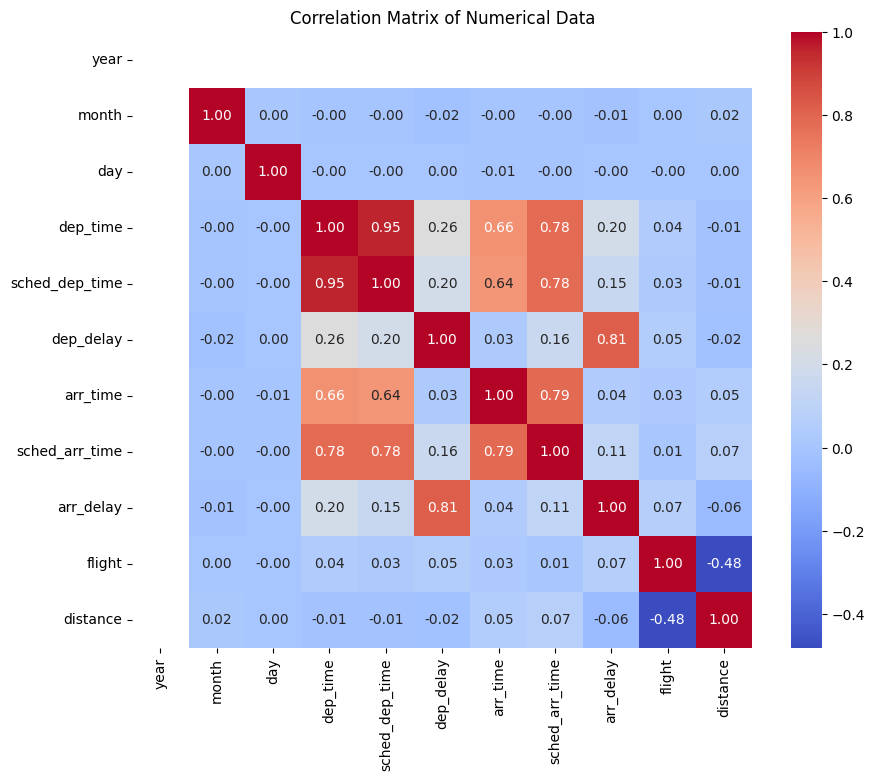

In [30]:
%matplotlib inline

import seaborn as sns

# Select only numerical columns for correlation
numerical_df = df1.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical data
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Data')
plt.show()

Q : what columns has high interactions ?

- explanation: high correlation between arr_delay and dep_delay 
- finding: Once there is departure delay, high possiblity to have arrival delay => too obvious? maybe not interesting findings


## EDA using Profiling Report

You can do EDA all at once with ProfilingReport!

In [65]:
from ydata_profiling import ProfileReport

In [66]:
# Profiling : https://docs.profiling.ydata.ai/latest/
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Q: Does this result have the same result from what you have done above? 

### (Task 4) Find the highest value from the 'dep_delay' column and discuss why it is the case.

### (Task 5) Draw scatter plot with 'dep_delay' and 'arr_delay'. Do you find anything weird from there? Fix the plot

##  Visualize the comparison of flight volumes departing from EWR, JFK, and LGA

Ref: airport code (https://www.world-airport-codes.com/us-top-40-airports.html)


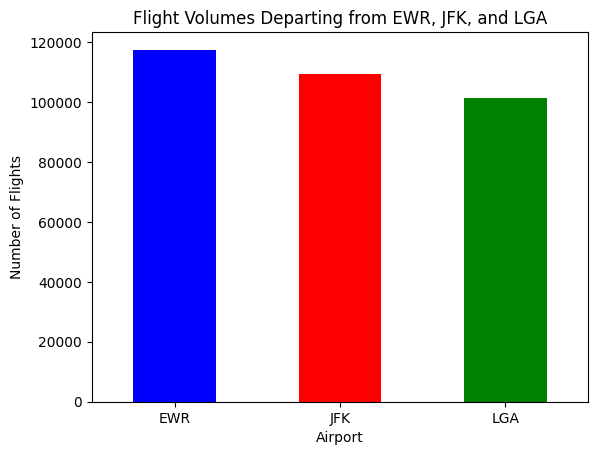

In [89]:
# Group by 'origin' and count the number of flights from each airport
flight_counts = df2.groupby('origin').size()

# Plotting
flight_counts.plot(kind='bar', color=['blue', 'red', 'green'])

# Adding title and labels
plt.title('Flight Volumes Departing from EWR, JFK, and LGA')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)  # Rotate labels to improve readability

# Show the plot
plt.show()

Q: Explain why you chose the chart above and what airport has highest number of flights taking off from ?

##  Departure delay from airports

In [93]:
# you want to include only rows for departure delay, excluding early departure.
df3 = df2[df2['dep_delay'] > 0]
len(df3)

128043

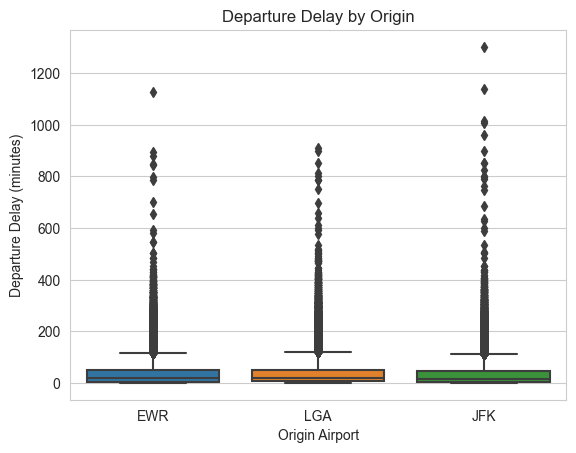

In [182]:
sns.boxplot(x='origin', y='dep_delay', data=df3)

# Adding title and labels (optional)
plt.title('Departure Delay by Origin')
plt.xlabel('Origin Airport')
plt.ylabel('Departure Delay (minutes)')

# Show plot
plt.show()

/var/folders/8b/slvdhz2n0jngxwl0lkwvg_jh0000gn/T/ipykernel_72661/1975685403.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delay_Frame=df3.groupby(by='origin').mean()


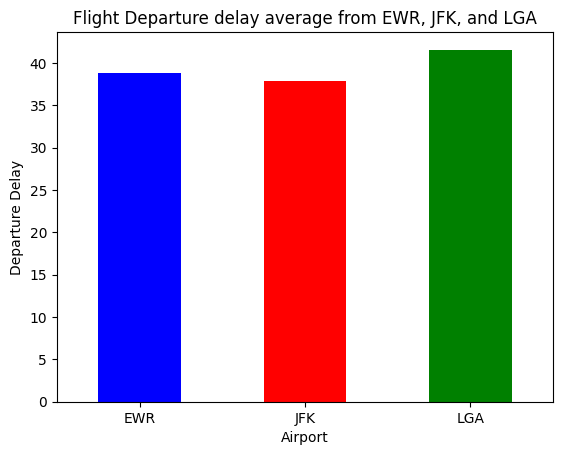

In [102]:

delay_Frame=df3.groupby(by='origin').mean()
# Plotting
delay_Frame['dep_delay'].plot(kind='bar', color=['blue', 'red', 'green'])

# Adding title and labels
plt.title('Flight Departure delay average from EWR, JFK, and LGA')
plt.xlabel('Airport')
plt.ylabel('Departure Delay')
plt.xticks(rotation=0)  # Rotate labels to improve readability

# Show the plot
plt.show()

what airport has highest departure delay ? Any relationship with 'No. 5's results? 

(ANS)

## Visualize Flight Carrier Frequency

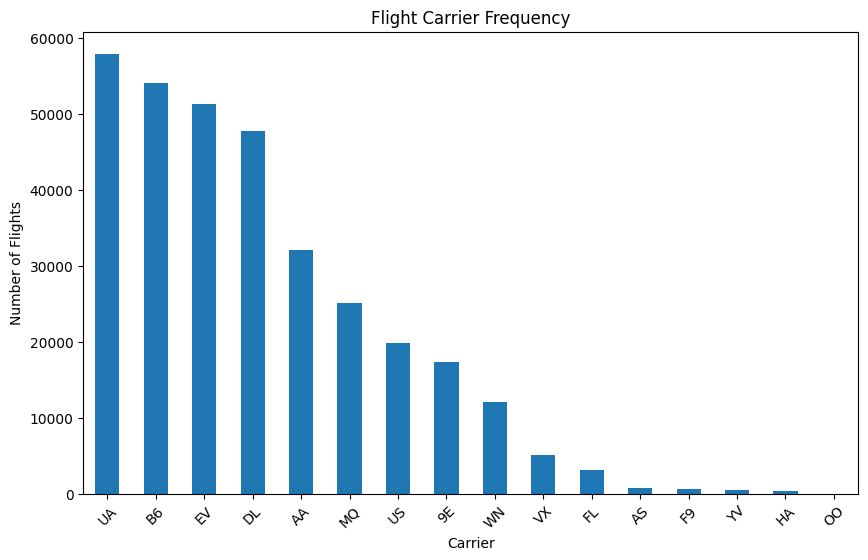

In [117]:
# Count the frequency of each carrier
carrier_counts = df2['carrier'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))
carrier_counts.plot(kind='bar')
plt.title('Flight Carrier Frequency')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

Q: what are the top3 frequent flight carrers?

(ANS) UA, B6, EV

## Flight Speed

You want to compare Carriers' flight speed

In [40]:
df.head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T10:00:00Z  
1      1416     5      29  2013-01-01T10:00:00Z  
2      1089     5      40  2013-01-01T10:00:00Z  
3      1576     5      45  2013-01-01T10:00:00Z  
4       762     6       0  2013-01-01T11:00:00Z

In [41]:
df.dropna(axis=0,how ='any', inplace=True)


<Axes: xlabel='air_time', ylabel='distance'>

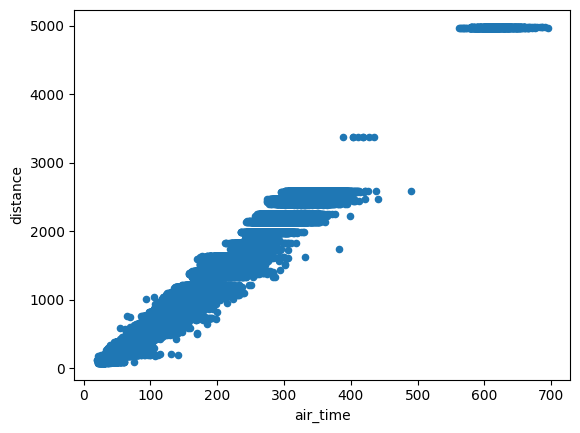

In [43]:
# draw the scatter plot with 'air_time' and 'distance'
df.plot.scatter('air_time','distance')

In [45]:
##Let's calculate the flight speed first as we dont have flight speed in the dataset 
df['aircraft_speed']=(df['distance'] / df['air_time']) * 60

This time, you want to compare Flight Speed using two plots: Box plot and Violin plot

[Text(0.5, 0, 'Aircarft Carrier'), Text(0, 0.5, 'Aircraft Speed')]

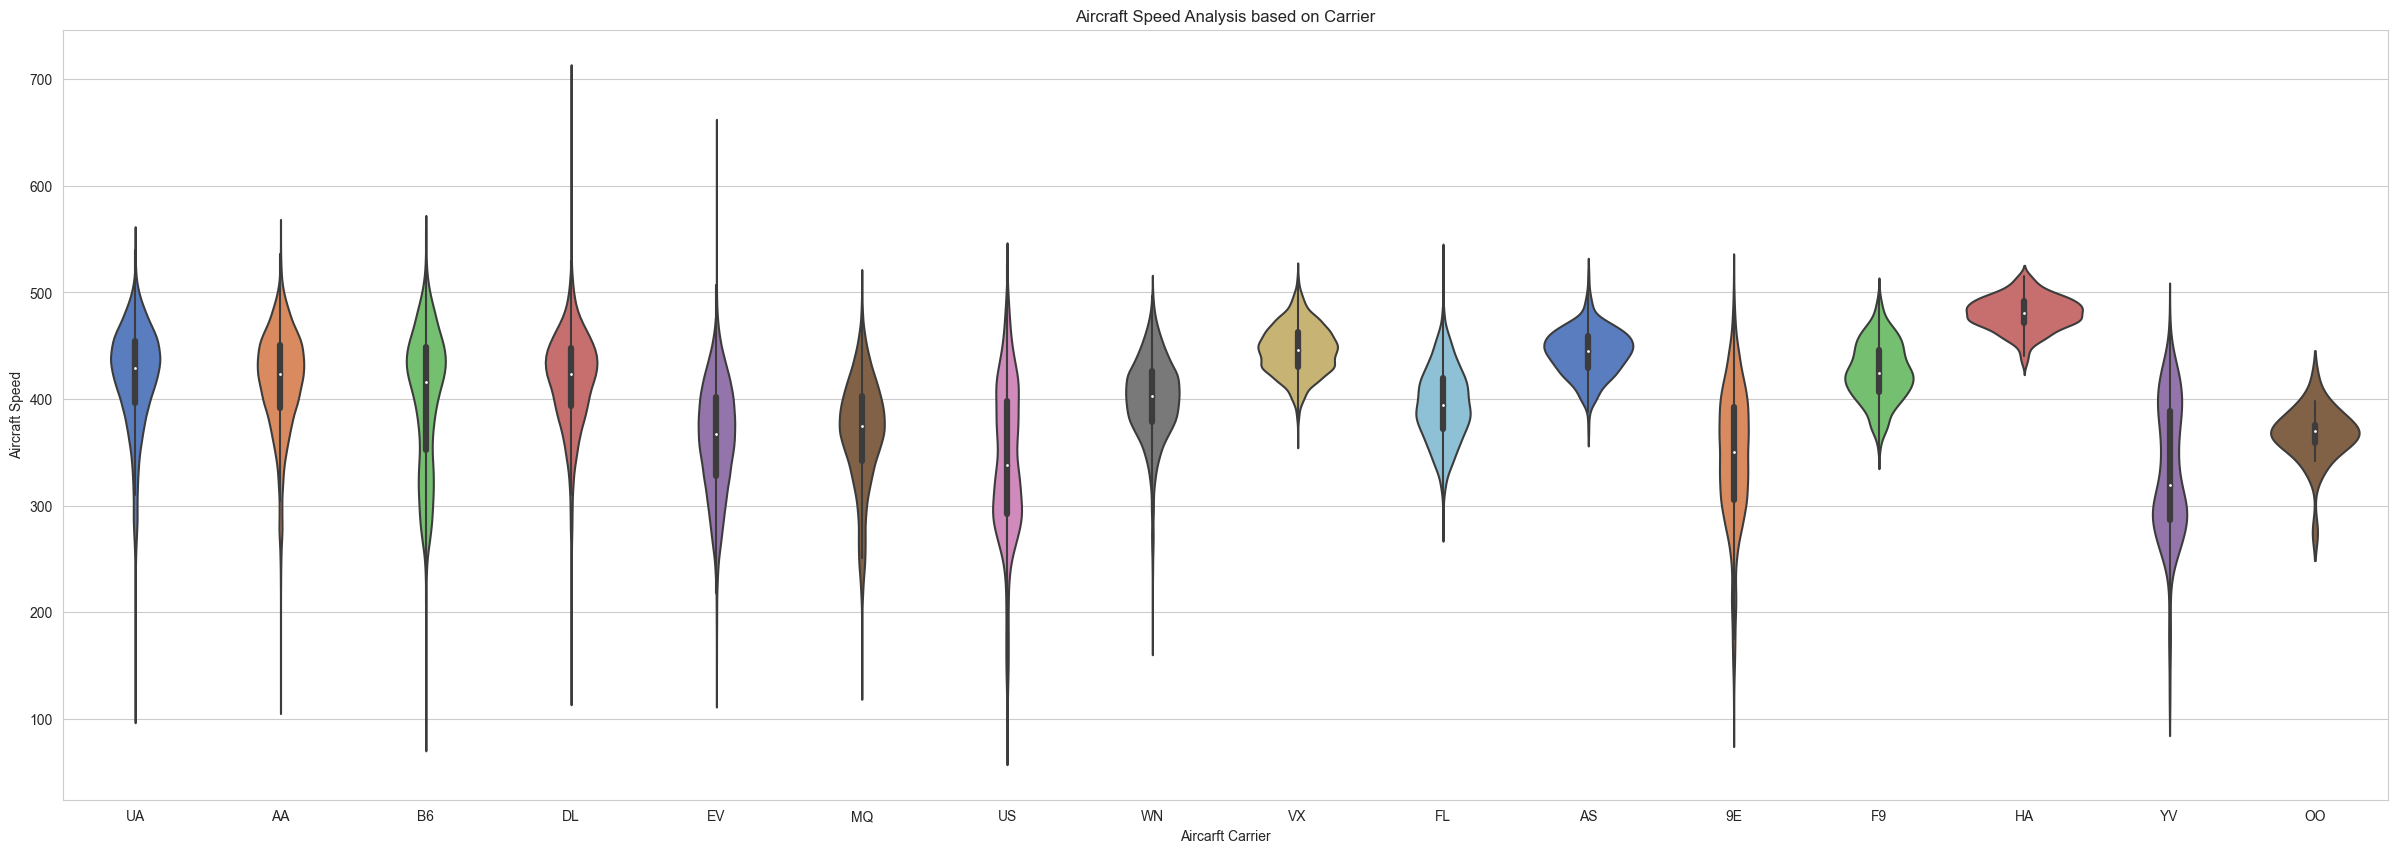

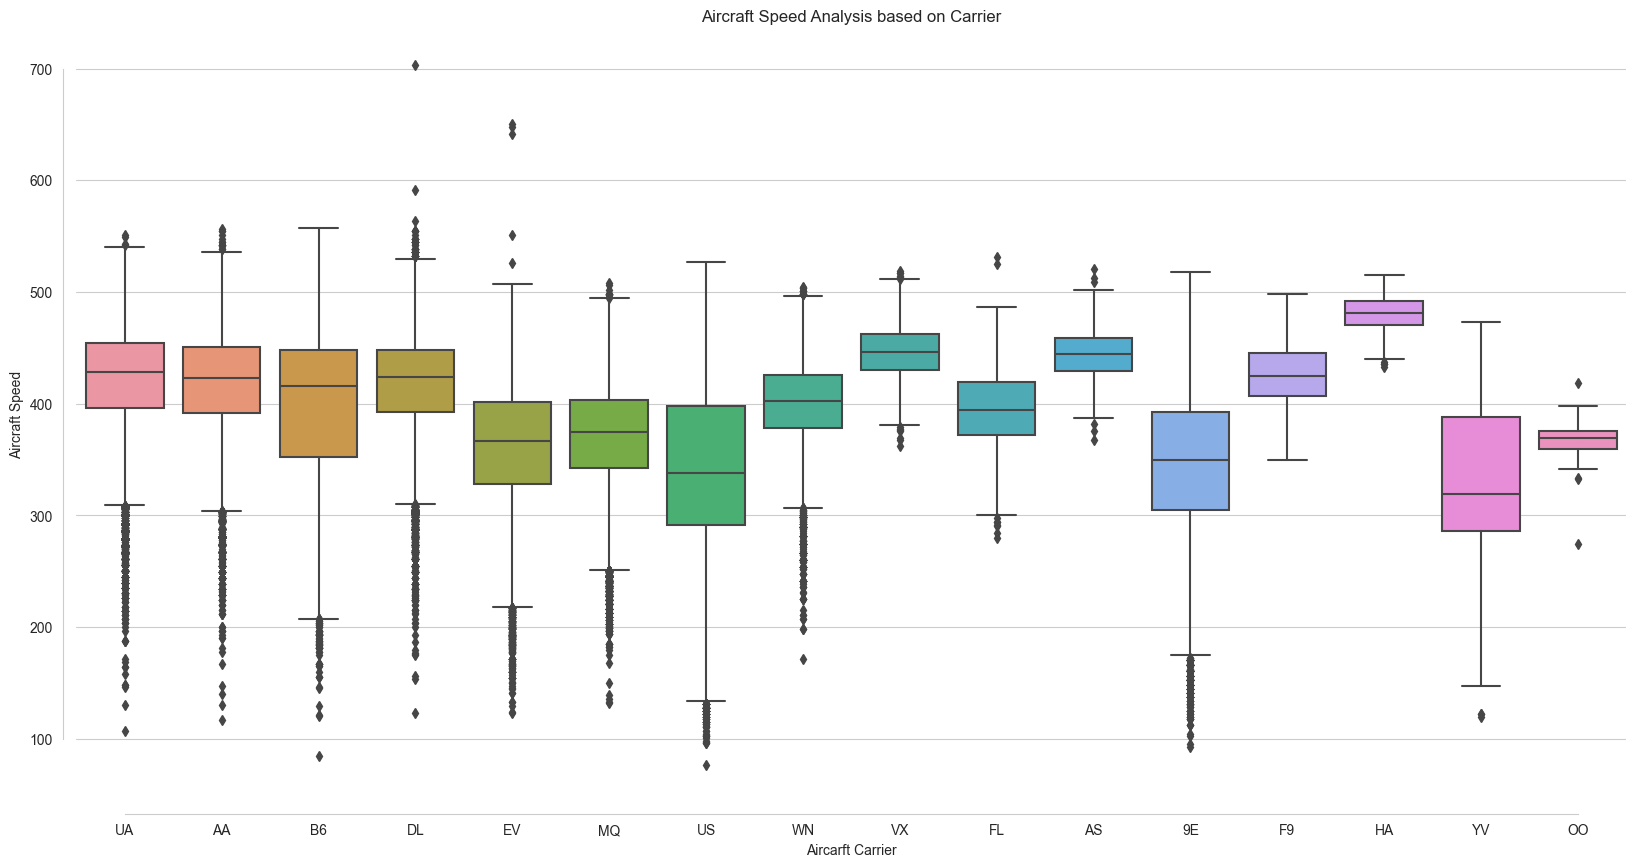

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,10))

#Below visualisations tell us about the speed variations of the Aircrafts 

# Violin plot
ax=sns.violinplot(x='carrier', y='aircraft_speed', 
               data=df,palette='muted')

plt.title('Aircraft Speed Analysis based on Carrier')
ax.set(xlabel='Aircarft Carrier', ylabel='Aircraft Speed')


#Box and Whisker Graph
plt.figure(figsize=(20,10))
ax=sns.boxplot(x="carrier", y="aircraft_speed",             
            data=df)
sns.despine(offset=10, trim=True)
plt.title('Aircraft Speed Analysis based on Carrier')
#ax.set_xlabels("Airport")
#ax.set_ylabels("Average Departure Delay")
ax.set(xlabel='Aircarft Carrier', ylabel='Aircraft Speed')

In [47]:
# Check a value that looks like an outlier
df[df['aircraft_speed']>700]

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
216447  2013      5   25    1709.0            1700        9.0    1923.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
216447            1937      -14.0      DL    1499  N666DN    LGA  ATL   

        air_time  distance  hour  minute             time_hour  aircraft_speed  
216447      65.0       762    17       0  2013-05-25T21:00:00Z      703.384615

## Top 5 - Maximum number of flights headed towards Destination Airport

In [55]:
destflightcountdf=df2.groupby(["dest"],sort=True).count()
dest_air = destflightcountdf['dep_delay'].sort_values(ascending=False).head(5)


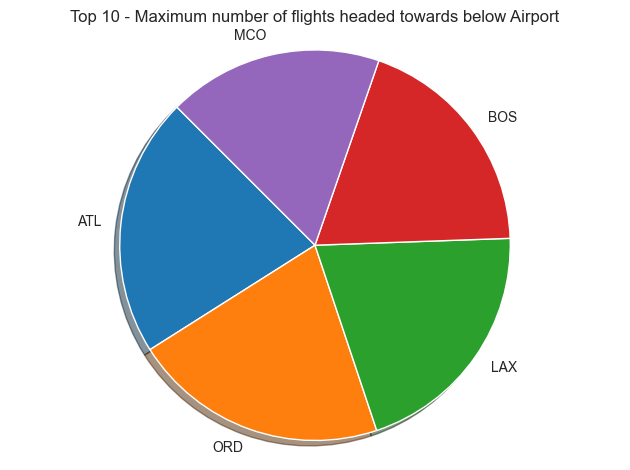

In [56]:
# Pie chart
labels = dest_air.index
sizes = dest_air.values
# only "explode" the 2nd slice (i.e. 'Hogs')
# explode = (0.1, 0, 0, 0,0)
#add colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, 
        shadow=True, startangle=135)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Top 10 - Maximum number of flights headed towards below Airport')
plt.tight_layout()
plt.show()

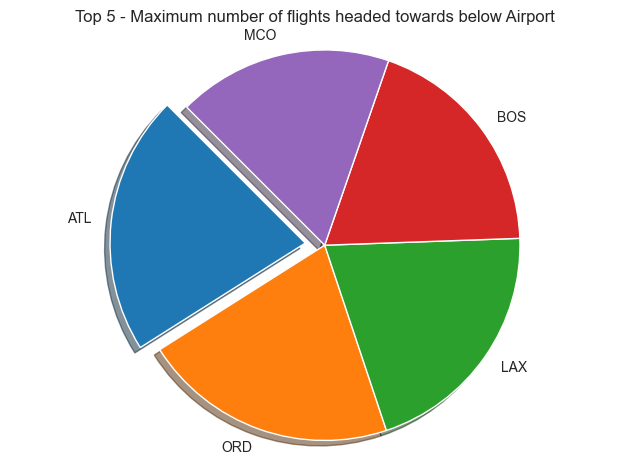

In [57]:
# Pie chart
labels = dest_air.index
sizes = dest_air.values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0, 0, 0,0)
#add colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, 
        shadow=True, startangle=135)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Top 5 - Maximum number of flights headed towards below Airport')
plt.tight_layout()
plt.show()

Q: what chart do you choose for visualization and why do you choose? 

##  On Time Arrival Performance of Airports

Text(0.5, 0, 'Origin Airports')

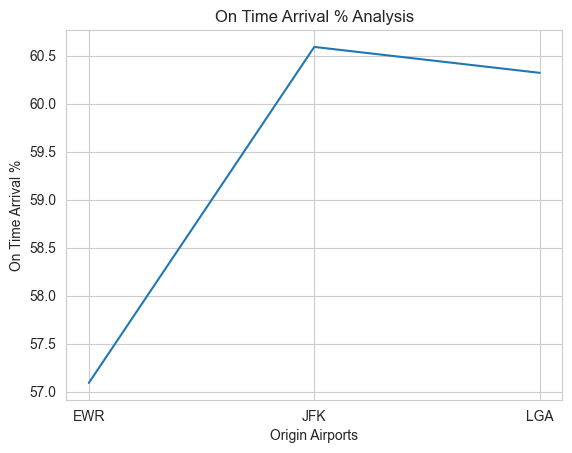

In [176]:
# Count rows of arrival on time grouped by airports
ota=(df2[df2["arr_delay"] <= 0].groupby("origin").count())
all = df2.groupby("origin").count()
OnTimeArrivalPerc=np.round(((ota["year"]/all['month']) * 100),decimals=2)

plt.plot(OnTimeArrivalPerc)
plt.title("On Time Arrival % Analysis")
plt.ylabel("On Time Arrival %")
plt.xlabel("Origin Airports")

In [171]:
df2.head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  distance  \
0             819       11.0      UA    1545  N14228    EWR  IAH      1400   
1             830       20.0      UA    1714  N24211    LGA  IAH      1416   
2             850       33.0      AA    1141  N619AA    JFK  MIA      1089   
3            1022      -18.0      B6     725  N804JB    JFK  BQN      1576   
4             837      -25.0      DL     461  N668DN    LGA  ATL       762   

              time_hour  
0  2013-01-01T10:00:00Z  
1  2013-01-01T10:00:00Z  
2  2013-01-01T10:00:00Z  
3  2013-01-01T10:00:00Z  
4  2013-01-01T11:00:00Z

Q: Share your insights from ten steps above